## MacKenzie _et al._ (2002) Model

For $N$ sites, the likelihood of specie occupancy is modeled as:

$$
L(\psi, p_{it}|y_i)=\prod_{i=1}^NL(\psi_i, p_{it}|y_i)
$$
where $L(\psi_i, p_{it}|y_i)$ is the liklihood of site $i$ given by
$$
L(\psi_i, p_{it}|y_i)=\mathbf{1}_y(1)\bigg[\psi_i \prod_{j=1}^Tp_{it}^{y_{it}}(1-p_{it})^{1-y_{it}}\bigg]+(1-\mathbf{1}_y(1))\bigg[\psi_i\prod_{j=1}^T(1-p_{it})^{1-y_{it}}+(1-\psi_i)\bigg]
$$

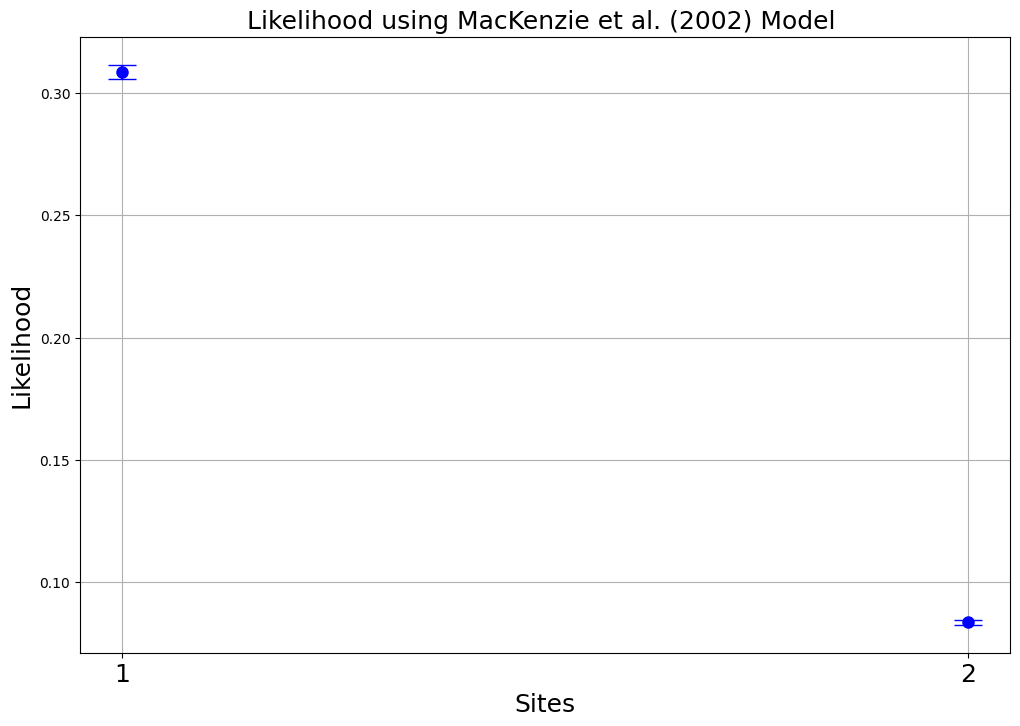

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_sites = 2
num_visits = 8
num_simulations = 10000



means = []
medians = []
std_errors = []  # List to store standard errors

for i in range(1, num_sites + 1):
    likelihood_site_vec = []
    
    for _ in range(num_simulations):
        
        # Site-specific occupancy probability
        if i == 1:
            psi_i = np.random.uniform(0.8, 1)  # Site 1: 80%-100% chance to be occupied
        else:
            psi_i = np.random.uniform(0.8, 0.9)  # Site 2: 80%-90% chance to be occupied
        
        det_prob, undet_prob = 1, 1
        y=[]
        for t in range(num_visits):
            # Detection probability for each site
            if i == 1:
               y_it = 1 if np.random.uniform(0, 1) <= psi_i else 0  # Site 1: psi_i% chance of 1's
               p_it = np.random.uniform(0.9, 1)  # Site 1: 90%-100% chance to detect
            else:
               y_it = 1 if np.random.uniform(0, 1) <= psi_i else 0  # Site 2: psi_i% chance of 1's
               p_it = np.random.uniform(0.8, 0.9)  # Site 2: 80%-90% chance to detect
            
            # Update detection and non-detection probabilities
            det_prob *= (p_it ** y_it) * ((1 - p_it) ** (1 - y_it))
            undet_prob *= (1 - p_it) ** (1 - y_it)
            y.append(y_it)
        
        # Likelihood calculation for the site
        indicator= 1 if 1 in y else 0
        likelihood_site = indicator*psi_i * det_prob + (1-indicator)*(psi_i * undet_prob + (1-psi_i))
        likelihood_site_vec.append(likelihood_site)
    
    
    # Calculate statistics for each site
    mean_likelihood = np.mean(likelihood_site_vec)
    means.append(mean_likelihood)
    
    # Standard error for each site
    std_error = np.std(likelihood_site_vec)/np.sqrt(num_simulations) 
    std_errors.append(std_error)



# Prepare for error bar plot
plt.figure(figsize=(12, 8))

# Error bar plot with standard error
plt.errorbar(range(1, num_sites + 1), means, yerr=std_errors, marker='o', color='blue',
             linestyle='', markersize=8, capsize=10)

plt.title('Likelihood using MacKenzie et al. (2002) Model ', fontsize=18)
plt.xlabel('Sites', fontsize=18)
plt.ylabel('Likelihood', fontsize=18)
# plt.legend(fontsize=18)
plt.xticks(ticks=range(1, num_sites + 1), fontsize=18) 
plt.grid(True)
plt.show()


# Increasing number of sites

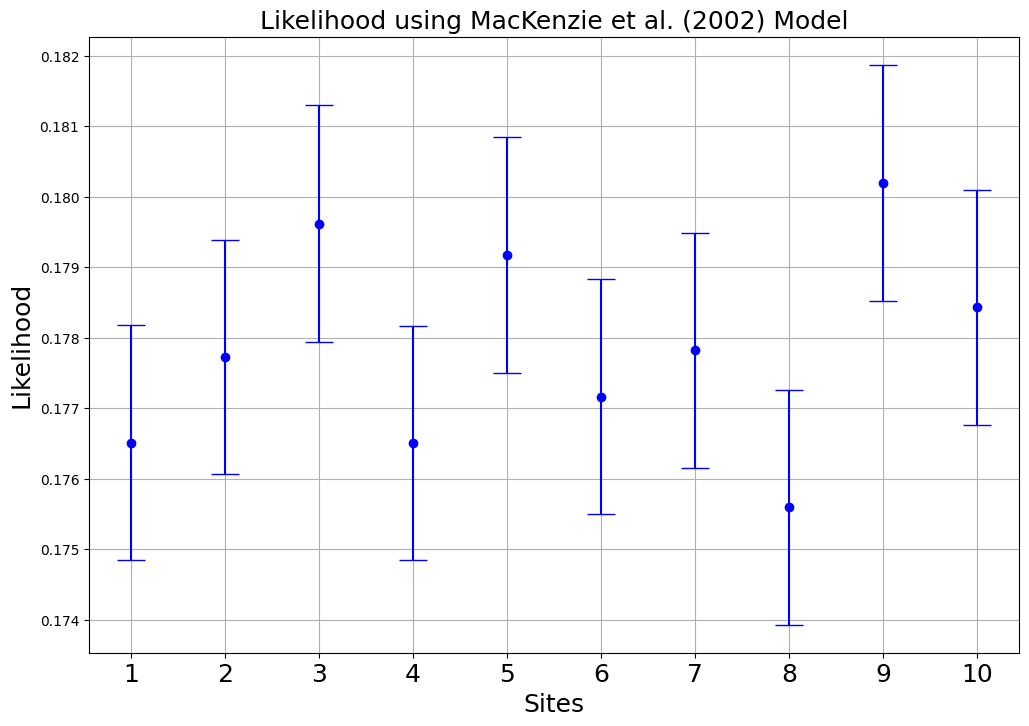

In [24]:
num_sites = 10
# Generate occupancy and detection probabilities
psi = np.random.uniform(0.8, 1, size=[num_sites,num_simulations])

p = np.random.uniform(0.8, 1, size=[num_sites, num_visits, num_simulations])


# Initialize storage for statistics
means = {str(i): [] for i in range(1, num_sites + 1)}
medians = {str(i): [] for i in range(1, num_sites + 1)}
std_errors = {str(i): [] for i in range(1, num_sites + 1)}
likelihood_vec = {str(i): [] for i in range(1, num_sites + 1)}

# Iterate over each site
for i in range(1, num_sites + 1):
    likelihood_site_vec = []
   
    for n in range(num_simulations):
        psi_in = psi[i-1,n]  # Occupancy probability
        det_prob, undet_prob = 1, 1

        # Calculate likelihood for each visit
        y=[]
        for t in range(num_visits):
            p_it = p[i-1,t, n]  # Detection probability
            y_it = 1 if np.random.uniform(0, 1) <= psi_in else 0
            
            # Update detection and non-detection probabilities
            det_prob *= (p_it ** y_it) * ((1 - p_it) ** (1 - y_it))
            undet_prob *= (1 - p_it) ** (1 - y_it)

            y.append(y_it)

        # Likelihood calculation for the site
        indicator= 1 if 1 in y else 0
        likelihood_site = indicator*psi_i * det_prob + (1-indicator)*(psi_i * undet_prob + (1-psi_i))
        likelihood_site_vec.append(likelihood_site)

    # Store likelihoods
    likelihood_vec[str(i)].extend(likelihood_site_vec)

    # Calculate statistics
    mean_likelihood = np.mean(likelihood_site_vec)
    means[str(i)].append(mean_likelihood)

    median_likelihood = np.median(likelihood_site_vec)
    medians[str(i)].append(median_likelihood)

    std_error = np.std(likelihood_site_vec) / np.sqrt(num_simulations)
    std_errors[str(i)].append(std_error)

# Error bar plot
plt.figure(figsize=(12, 8))
mean_values = [means[str(i)][0] for i in range(1, num_sites + 1)]
std_error_values = [std_errors[str(i)][0] for i in range(1, num_sites + 1)]

plt.errorbar(range(1, num_sites + 1), mean_values, yerr=std_error_values, marker='o', color='blue',
             linestyle='', capsize=10)

plt.title('Likelihood using MacKenzie et al. (2002) Model', fontsize=18)
plt.xlabel('Sites', fontsize=18)
plt.ylabel('Likelihood', fontsize=18)
plt.xticks(ticks=range(1, num_sites + 1), fontsize=18)
plt.grid(True)
plt.show()



# Applying to more than one species

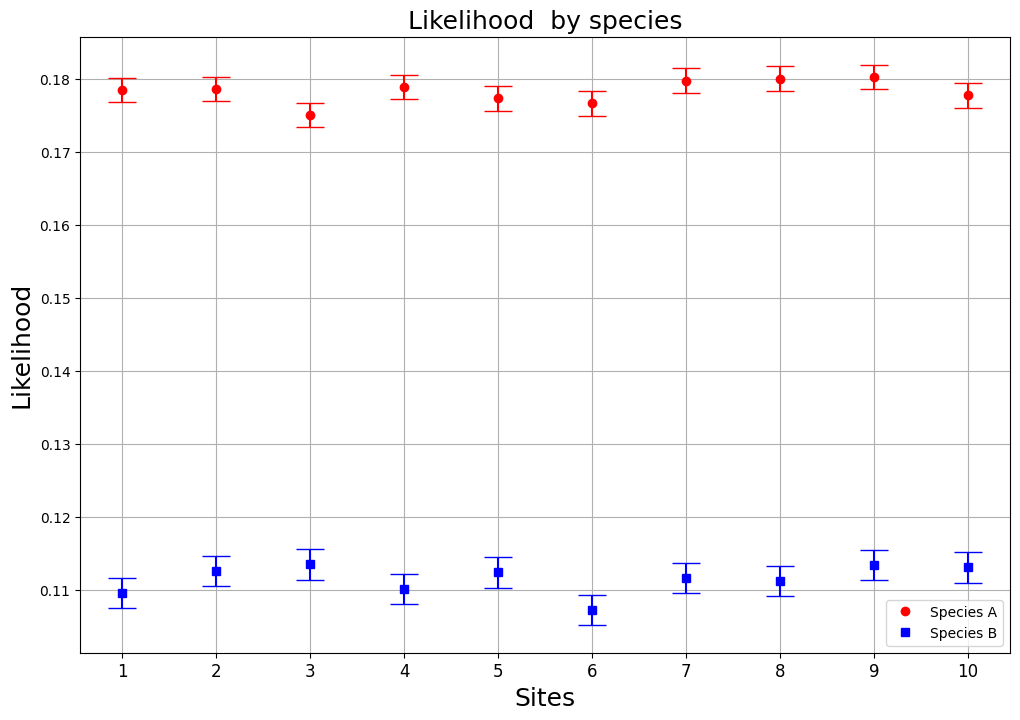

In [25]:
num_sites = 10
psi = [
    np.random.uniform(0.8, 1, size=[num_sites, num_simulations]),  # Species A
    np.random.uniform(0.7, 0.9, size=[num_sites, num_simulations])   # Species B
]

p = [
    np.random.uniform(0.8, 1, size=[num_sites, num_visits, num_simulations]),  # Species A
    np.random.uniform(0.9, 1, size=[num_sites, num_visits, num_simulations])   # Species B
]

# Initialize storage for statistics
means = np.zeros(num_sites)  # Means for each site
medians = np.zeros(num_sites)  # Medians for each site
std_errors = np.zeros(num_sites)  # Standard errors for each site
likelihood_vec = {i: [] for i in range(num_sites)}  # Likelihood vectors for each site

# Prepare to plot
colors = ['red', 'blue']
markers = ['o', 's']
species_names = ['Species A', 'Species B']

plt.figure(figsize=(12, 8))

# Iterate over each species
for s in range(2):  # For Species A (0) and Species B (1)
    plt.plot([], [], label=species_names[s], color=colors[s], marker=markers[s], linestyle='')

    # Iterate over each site
    for i in range(num_sites):
        likelihood_site_vec = []
    
        for n in range(num_simulations):
            psi_in = psi[s][i, n]  # Occupancy probability for species s at site i
            det_prob, undet_prob = 1, 1
    
            # Calculate likelihood for each visit
            y=[]
            for t in range(num_visits):
                p_it = p[s][i, t, n]  # Detection probability for species s at site i, visit t
                y_it = 1 if np.random.uniform(0, 1) <= psi_in else 0
                
                # Update detection and non-detection probabilities
                det_prob *= (p_it ** y_it) * ((1 - p_it) ** (1 - y_it))
                undet_prob *= (1 - p_it) ** (1 - y_it)
                y.append(y_it)
    
            # Likelihood calculation for the site
            indicator= 1 if 1 in y else 0
            likelihood_site = indicator*psi_i * det_prob + (1-indicator)*(psi_i * undet_prob + (1-psi_i))
            likelihood_site_vec.append(likelihood_site)
    
        # Store likelihoods
        likelihood_vec[i] = likelihood_site_vec
    
        # Calculate statistics
        means[i] = np.mean(likelihood_site_vec)
        medians[i] = np.median(likelihood_site_vec)
        std_errors[i] = np.std(likelihood_site_vec) / np.sqrt(num_simulations)
    
        # Plot error bars for each site
        plt.errorbar(i + 1, means[i], yerr=std_errors[i], 
                     marker=markers[s], color=colors[s], capsize=10)

plt.title('Likelihood  by species', fontsize=18)
plt.xlabel('Sites', fontsize=18)
plt.ylabel('Likelihood', fontsize=18)
plt.xticks(ticks=range(1, num_sites + 1), fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Estimating liklihoods using eDNA data

In [28]:
import pandas as pd

# Load the data
file_path = 'M:/eDNA/Data/my_16S_data.xlsx'
df = pd.read_excel(file_path)

species_names = ['sheep', 'goat', 'jackdaw','blackbird']
sites =['London', 'Scotland']
visits = ['week_1', 'week_2', 'week_3']

colors = ['red', 'blue','green', 'black']
markers = ['o', 's','*', 'd']



# grouped_df = df[df['Common_Name'] == 'sheep'].groupby('Site')[visits].sum().reset_index()

for s in range(len(species_names)):
    grouped_df = df[df['Common_Name'] == species_names[s]].groupby('Site')[visits].sum().reset_index()
    for i in range(len(sites)):
        detection_hostory=[]
        for visit in visits:
            abundance = grouped_df[visit][i]
            y_it = 1 if abundance>0 else 0
            detection_hostory.append(y_it)
        print(f' The detection history of {species_names[s]} in {sites[i]} = ', detection_hostory)

df.head(150)

 The detection history of sheep in London =  [1, 0, 1]
 The detection history of sheep in Scotland =  [0, 1, 1]
 The detection history of goat in London =  [0, 0, 0]
 The detection history of goat in Scotland =  [0, 0, 0]
 The detection history of jackdaw in London =  [1, 1, 1]
 The detection history of jackdaw in Scotland =  [1, 0, 0]
 The detection history of blackbird in London =  [0, 1, 1]
 The detection history of blackbird in Scotland =  [0, 0, 1]


,Site,Phylum,Class,Family,Species,Common_Name,week_1,week_2,week_3,week_4
0,1,Chordata,Actinopterygii,Cyprinidae,Abramis brama,common bream,0,42,0,_
1,1,Chordata,Actinopterygii,Cyprinidae,Alburnus alburnus,common bleak,0,0,0,_
2,1,Chordata,Amphibia,Bufonidae,Bufo bufo,common toad,0,0,92,_
3,1,Chordata,Amphibia,Salamandridae,Lissotriton vulgaris,smooth newt,0,0,58,_
4,1,Chordata,Aves,acciptridae,Accipiter nisus,sparrowhawk,0,61,0,_
...,...,...,...,...,...,...,...,...,...,...
115,2,Chordata,Mammalia,Gliridae,Muscardinus avellanarius,hazel dormouse,0,0,0,0
116,2,Chordata,Mammalia,Muridae,Apodemus sylvaticus,wood mouse,0,0,0,0
117,2,Chordata,Mammalia,Muridae,Mus musculus,mouse,0,0,0,0
118,2,Chordata,Mammalia,Muridae,Rattus sp.,rat,0,0,0,0


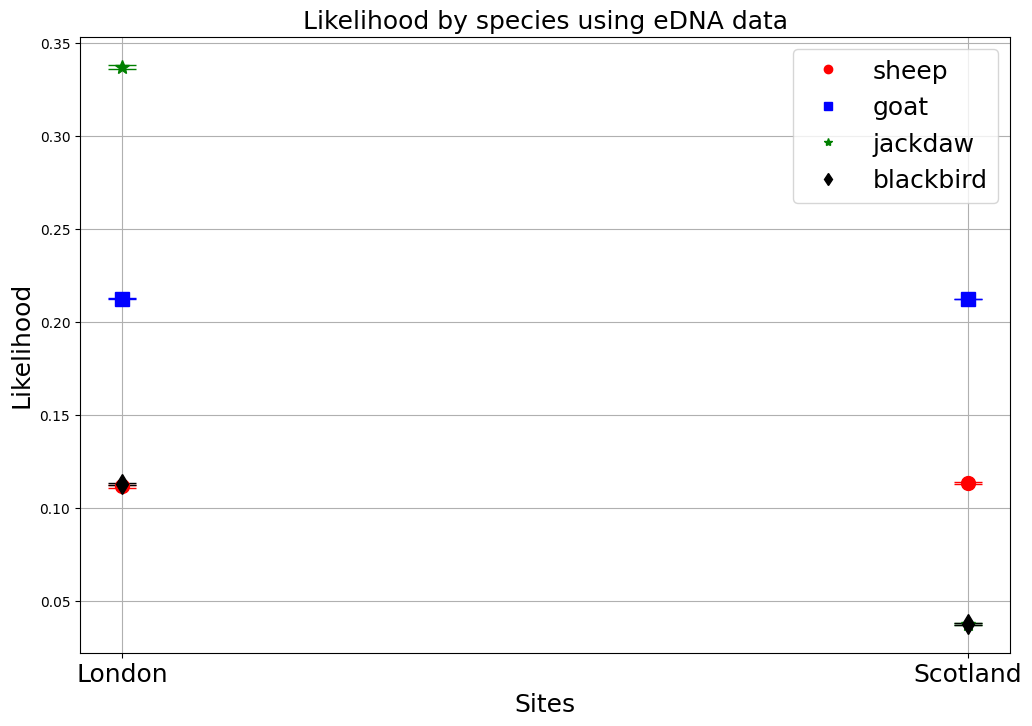

In [32]:
psi = np.random.uniform(0.5, 1, size=[len(species_names), num_sites,num_simulations])

p = np.random.uniform(0.5, 1, size=[len(species_names), num_sites, num_visits, num_simulations])

# Initialize storage for statistics
means = np.zeros(num_sites)  # Means for each site
medians = np.zeros(num_sites)  # Medians for each site
std_errors = np.zeros(num_sites)  # Standard errors for each site
likelihood_vec = {i: [] for i in range(num_sites)}  # Likelihood vectors for each site


plt.figure(figsize=(12, 8))

for s in range(len(species_names)):  # For Species A (0) and Species B (1)
    plt.plot([], [], label=species_names[s], color=colors[s], marker=markers[s], linestyle='')
    grouped_df = df[df['Common_Name'] == species_names[s]].groupby('Site')[visits].sum().reset_index()
    # Iterate over each site
    for i in range(len(sites)): 
        likelihood_site_vec = []
    
        for n in range(num_simulations):
            psi_in = psi[s][i, n]  # Occupancy probability for species s at site i
            det_prob, undet_prob = 1, 1
    
            # Calculate likelihood for each visit
            y=[]
            for t in range(len(visits)):
                abundance = grouped_df[visits[t]][i]
                y_it = 1 if abundance>0 else 0
                p_it = p[s][i, t, n]  
 
                
                # Update detection and non-detection probabilities
                det_prob *= (p_it ** y_it) * ((1 - p_it) ** (1 - y_it))
                undet_prob *= (1 - p_it) ** (1 - y_it)
                y.append(y_it)
    
            # Likelihood calculation for the site
            indicator= 1 if 1 in y else 0
            likelihood_site = indicator*psi_i * det_prob + (1-indicator)*(psi_i * undet_prob + (1-psi_i))
            likelihood_site_vec.append(likelihood_site)
    
        # Store likelihoods
        likelihood_vec[i] = likelihood_site_vec
    
        # Calculate statistics
        means[i] = np.mean(likelihood_site_vec)
        medians[i] = np.median(likelihood_site_vec)
        std_errors[i] = np.std(likelihood_site_vec) / np.sqrt(num_simulations)
    
        # Plot error bars for each site
        plt.errorbar(i + 1, means[i], yerr=std_errors[i], 
                     marker=markers[s], markersize=10, color=colors[s], capsize=10)

plt.title('Likelihood by species using eDNA data', fontsize=18)
plt.xlabel('Sites', fontsize=18)
plt.ylabel('Likelihood', fontsize=18)
plt.xticks(ticks=range(1, len(sites) + 1), labels=sites, fontsize=18)
plt.grid(True)
plt.legend(fontsize=18)
plt.show()
